In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [3]:
df = pd.read_csv(r'C:\Users\SUSHIL\Desktop\THE ALL PROJECTS\PROJECT NO. 4 - INDIAN LIVER PATIENT\indian_liver_patient.csv',header=0)
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Observing the data

In [4]:
df.shape

(583, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


# Replacing null values

In [6]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
df['Albumin_and_Globulin_Ratio']=df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean())

In [8]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

# Validating the data

In [9]:
cols=df.columns
for i in cols:
    print(i, ":", df[i].unique())

Age : [65 62 58 72 46 26 29 17 55 57 64 74 61 25 38 33 40 51 63 34 20 84 52 30
 48 47 45 42 50 85 35 21 32 31 54 37 66 60 19 75 68 70 49 14 13 18 39 27
 36 24 28 53 15 56 44 41  7 22  8  6  4 43 23 12 69 16 78 11 73 67 10 90]
Gender : ['Female' 'Male']
Total_Bilirubin : [ 0.7 10.9  7.3  1.   3.9  1.8  0.9  0.6  2.7  1.1  1.6  2.2  2.9  6.8
  1.9  4.1  6.2  4.   2.6  1.3 14.2  1.4  2.4 18.4  3.1  8.9  0.8  2.8
  2.   5.7  8.6  5.8  5.2  3.8  6.6  0.5  5.3  3.2  1.2 12.7 15.9 18.
 23.  22.7  1.7  3.  11.3  4.7  4.2  3.5  5.9  8.7 11.  11.5  4.5 75.
 22.8 14.1 14.8 10.6  8.   1.5  2.1  6.3  2.3 27.2  2.5  3.6 30.5 16.4
 14.5 18.5 23.2  3.7  3.3  7.1  6.7 22.6  7.5  5.   4.9  8.2  0.4  7.4
 23.3  7.9  3.4 19.8 32.6 17.7 20.  26.3  4.4  9.4 30.8 19.6 15.8  5.5
 20.2 27.7 11.1 10.2 42.8 15.2 16.6 17.3 22.5 16.7  7.7 15.6 12.1 25.
 15. ]
Direct_Bilirubin : [ 0.1  5.5  4.1  0.4  2.   0.7  0.2  0.3  1.3  0.8  0.5  1.   3.   1.9
  1.2  7.8  0.6  1.1  3.2  1.8  8.8  1.6  4.5  2.8  4.   2.7  2.4  

# Converting categorical variables into numerical

In [10]:
le=preprocessing.LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Gender'].unique()

array([0, 1])

Here, 0 is Female and 1 is Male, as label encoding is performed in an alphabetical order.

# Visualizing the Data

In [11]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


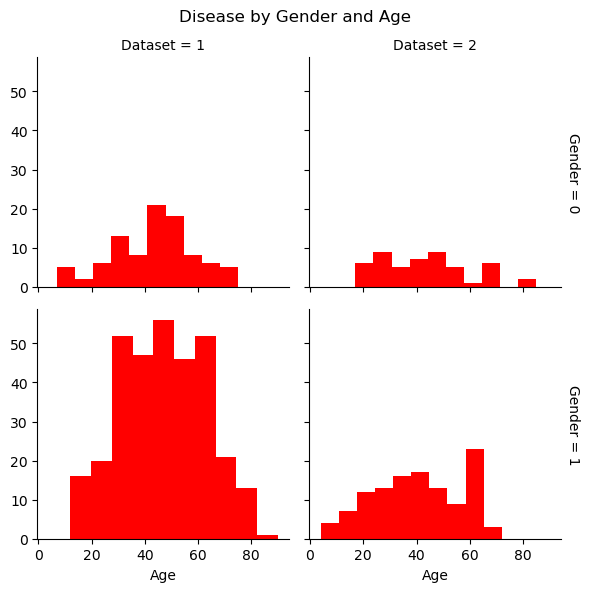

In [12]:
g = sns.FacetGrid(df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

As evident, age seems to play an important role in liver diseases in both males and females.

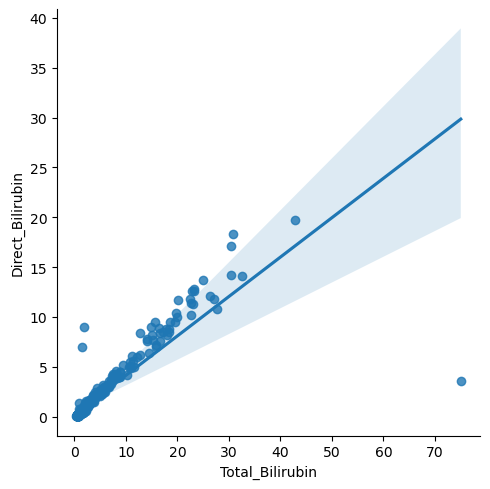

In [13]:
sns.lmplot(x="Total_Bilirubin", y="Direct_Bilirubin", data=df)

There is linear relationship between Direct Bilurubin and Total Biluribin. Hence one variable can be dropped.

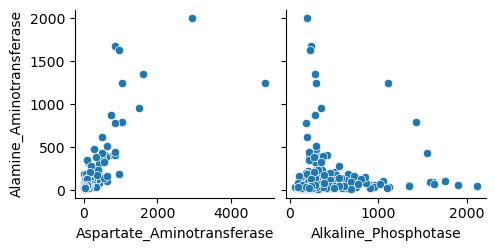

In [14]:
# sns.lmplot(x="Alamine_Aminotransferase", y="Aspartate_Aminotransferase", data=df)
sns.pairplot(data=df,x_vars=['Aspartate_Aminotransferase','Alkaline_Phosphotase'], y_vars=['Alamine_Aminotransferase'])

There is linear relationship between Alamine and Aspartate Aminotransferase. However, there is no relationship between Alamine Aminotransferase and Alkaline Phosphotase. Accordingly, Aspartate Aminotransferase can be dropped.

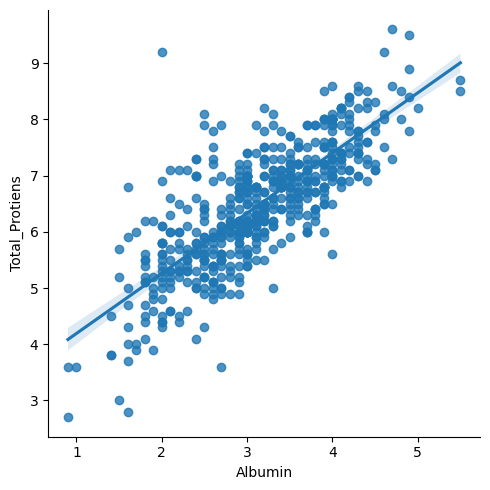

In [15]:
sns.lmplot(x="Albumin", y="Total_Protiens", data=df)

There is linear relationship between Total proteins and Albumin, hence one of the features can be dropped.

# Validating the observations with a HeatMap 

In [16]:
X=df.drop(['Dataset'],axis=1)
y=df['Dataset']

In [17]:
liver_corr = X.corr()
liver_corr

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322
Albumin_and_Globulin_Ratio,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000


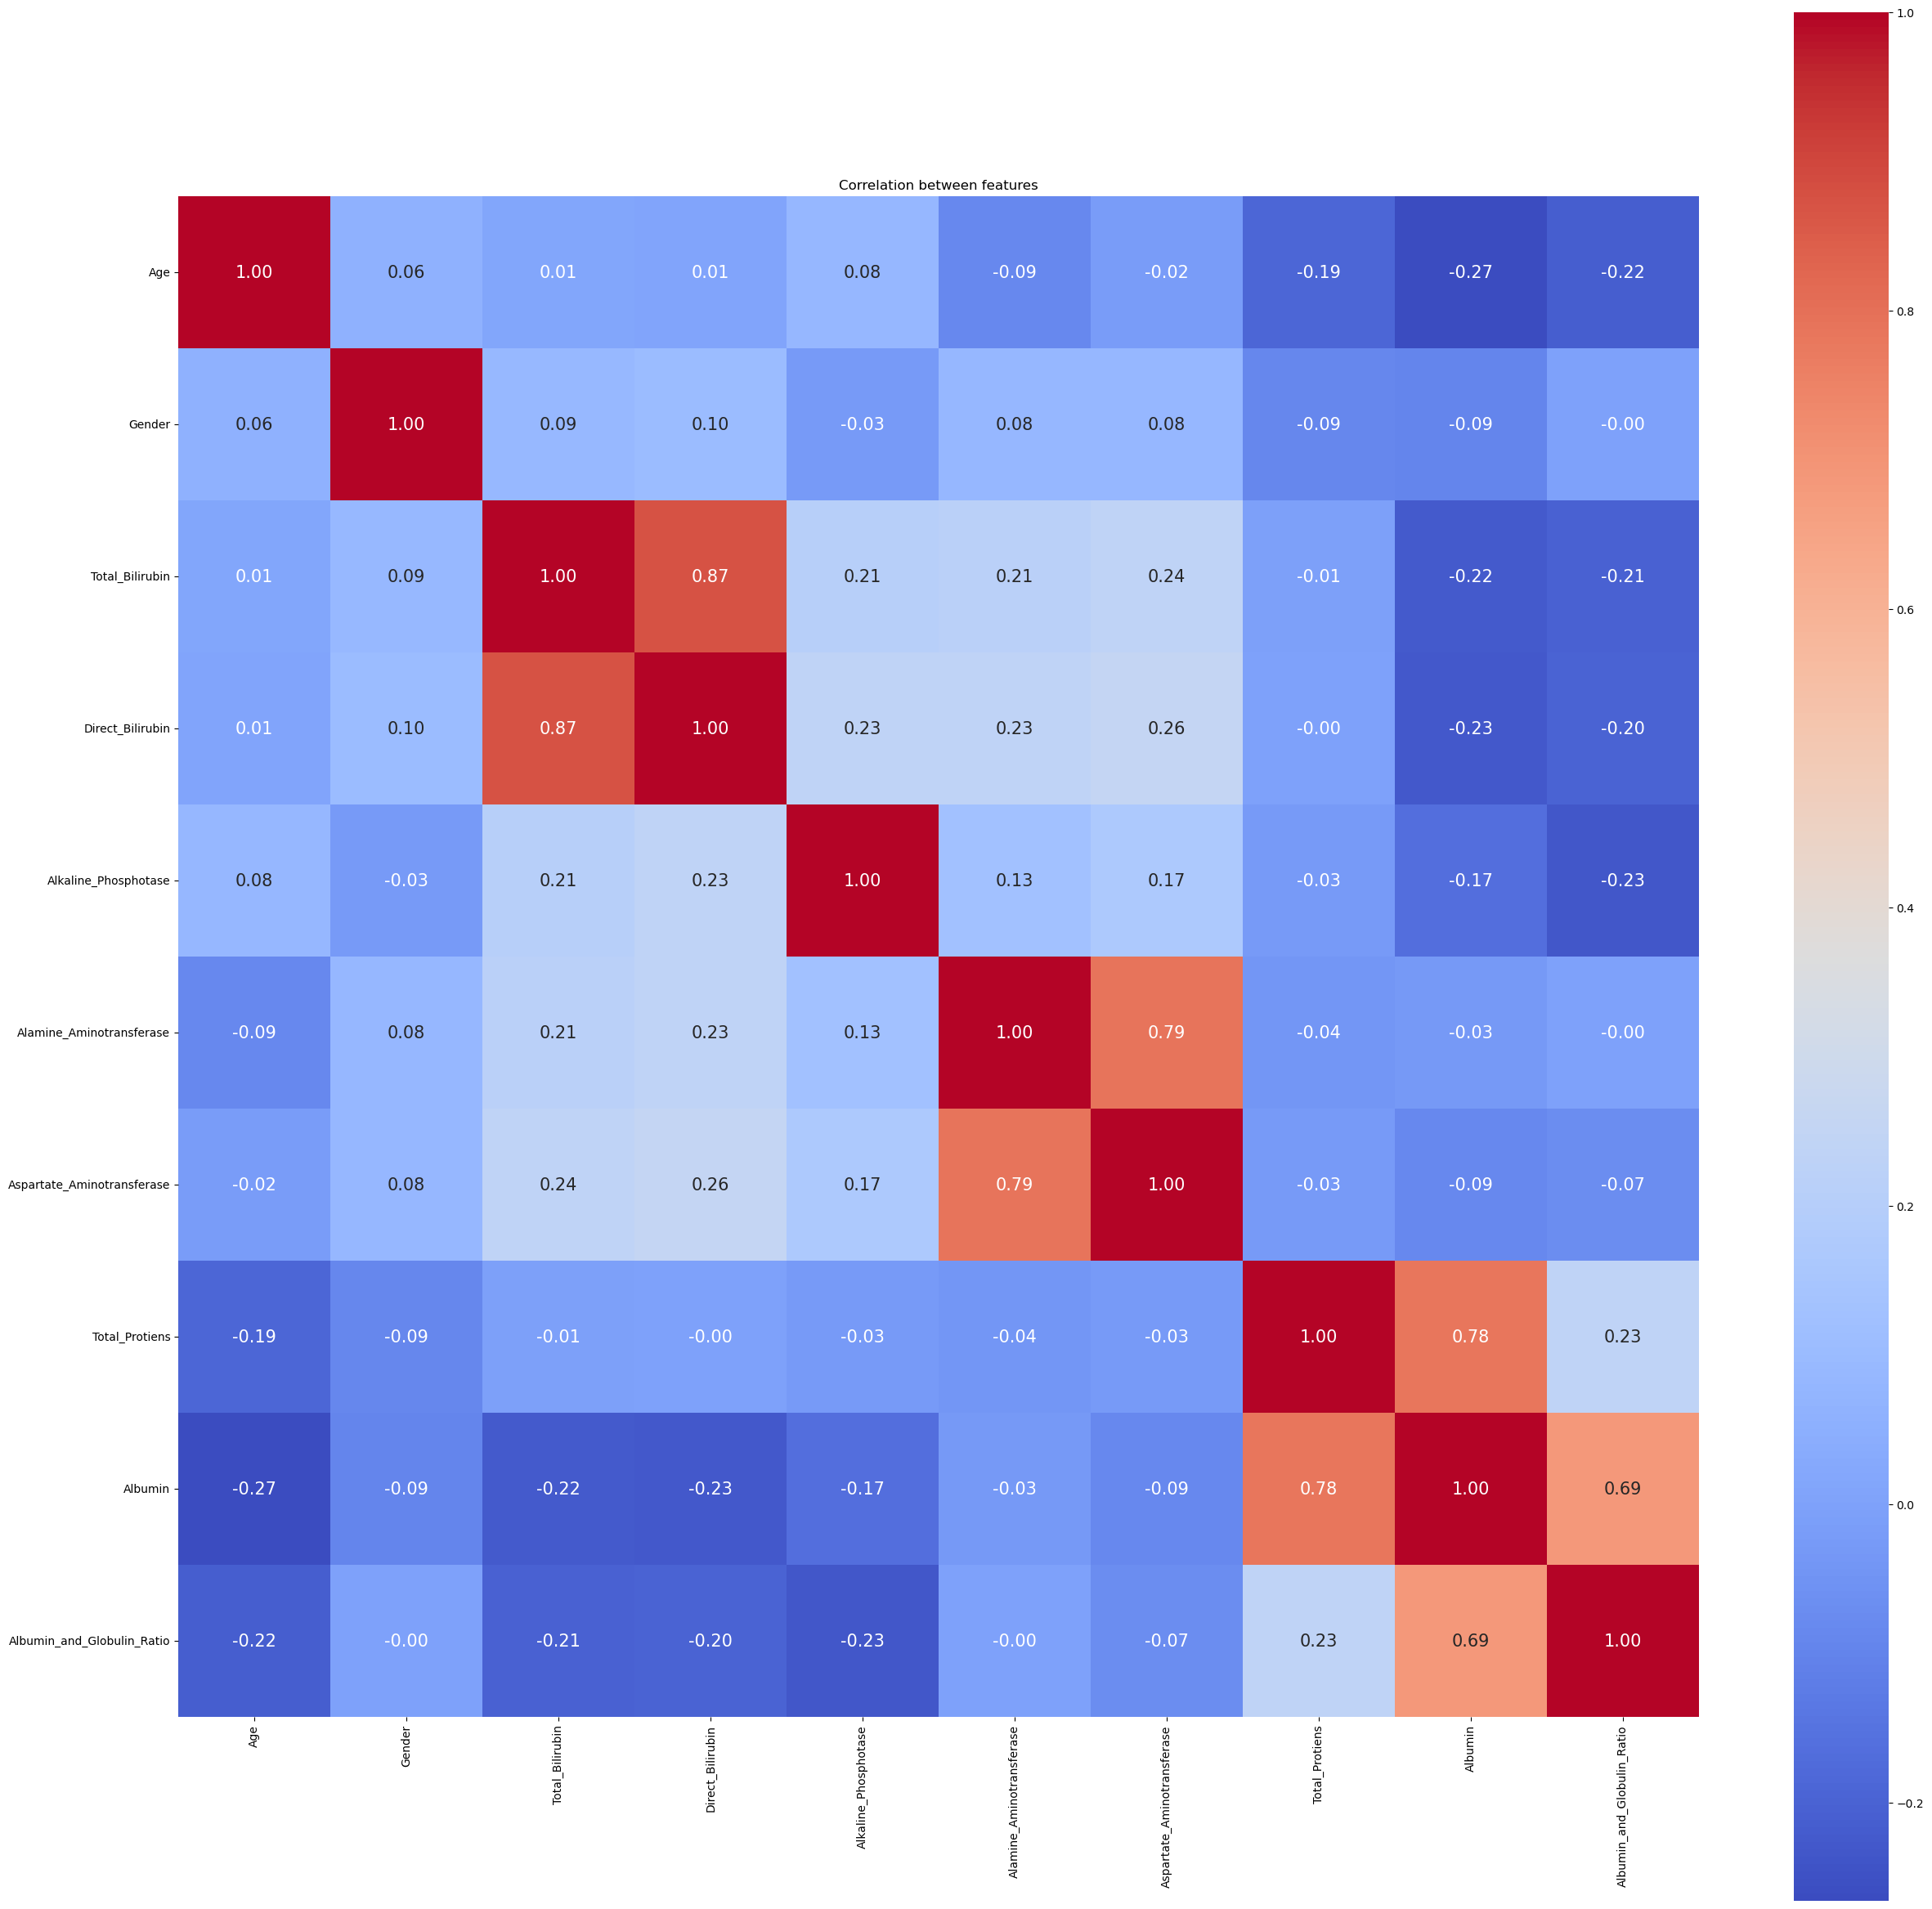

In [18]:
plt.figure(figsize=(30, 30))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

As per the observations from visualization and HeatMap, there are relationships between the following features:

Direct Bilirubin and Total Bilirubin

Alamine Aminotransferase and Aspartate Aminotransferase

Total proteins and Albumin

Albumin and Albumin-Globulin Ratio

This might lead to multicollinearity and biased results due to dependence between the independent variables. Hence, the following features will only be kept for training:

Total_Bilirubin

Alamine_Aminotransferase

Total_Protiens

Albumin_and_Globulin_Ratio

Albumin

# Logistic Regression

In [19]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [20]:
x=pd.DataFrame()
x=df[['Age','Gender','Total_Bilirubin','Alamine_Aminotransferase','Total_Protiens','Albumin_and_Globulin_Ratio','Albumin']].copy()
y=df['Dataset']

Using StandardScaler to generalize the data

In [21]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

Splitting the data for training and testing

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

Training the model

In [23]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_test_prediction=classifier.predict(X_test)
y_test_prediction

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [25]:
comparison=pd.DataFrame({'Actual':y_test,'Predicted':y_test_prediction})
comparison[0:10]

,Actual,Predicted
255,1,1
323,2,2
65,1,1
111,1,1
268,1,1
553,1,1
47,1,1
458,1,1
347,1,1
529,1,1


# Model Evaluation

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_test_prediction)
print(cfm)

print('classification report: ',)
print(classification_report(y_test,y_test_prediction))

acc=accuracy_score(y_test,y_test_prediction)
print('accuracy of the model: ',acc)

[[118   7]
 [ 39  11]]
classification report: 
              precision    recall  f1-score   support

           1       0.75      0.94      0.84       125
           2       0.61      0.22      0.32        50

    accuracy                           0.74       175
   macro avg       0.68      0.58      0.58       175
weighted avg       0.71      0.74      0.69       175

accuracy of the model:  0.7371428571428571


# Attempting other algorithms

# Decision Trees

In [27]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(random_state=10,max_depth=3)

#fit the model on data and predict the values

model_DecisionTree.fit(X_train,y_train)

y_pred=model_DecisionTree.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report: ',)
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[125   0]
 [ 50   0]]
classification report: 
              precision    recall  f1-score   support

           1       0.71      1.00      0.83       125
           2       0.00      0.00      0.00        50

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175

accuracy of the model:  0.7142857142857143


C:\Users\SUSHIL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SUSHIL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SUSHIL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest 

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_features=3)
model.fit(X_train,y_train)
y_pred=model_DecisionTree.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report: ',)
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[125   0]
 [ 50   0]]
classification report: 
              precision    recall  f1-score   support

           1       0.71      1.00      0.83       125
           2       0.00      0.00      0.00        50

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175

accuracy of the model:  0.7142857142857143


C:\Users\SUSHIL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SUSHIL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SUSHIL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# AdaBoost Classifier

In [29]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=200, random_state=15)
model.fit(X_train,y_train)
y_pred=model_DecisionTree.predict(X_test)

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report: ',)
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[125   0]
 [ 50   0]]
classification report: 
              precision    recall  f1-score   support

           1       0.71      1.00      0.83       125
           2       0.00      0.00      0.00        50

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175

accuracy of the model:  0.7142857142857143


C:\Users\SUSHIL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SUSHIL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SUSHIL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVC

In [30]:
from sklearn.svm import SVC
svc_model=SVC(kernel='poly',C=30,gamma=0.001)
svc_model.fit(X_train,y_train)
y_pred = svc_model.predict(X_test)
print(list(y_pred))
y_pred.shape

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report: ',)
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[[125   0]
 [ 50   0]]
classification report: 
              precision    recall  f1-score   support

           1       0.71      1.00      0.83       125
           2       0.00      0.00      0.00        50

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175

accuracy of the model:  0.7142857142857143


C:\Users\SUSHIL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SUSHIL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SUSHIL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
